<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install yahoofinancials

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
#companies = ['TSLA',"AMZN",'WMT','GOOG',"WEN","TGT",'T','TMUS', 'VZ','CTSH',"ACN"]
#startDate = "2018-01-02"
startDate = "2017-01-01"
endDate = "2021-10-21"
companies = [             
'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL',  'GOOGL', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 
'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON','APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB',
 'AVY',
'BKR', 'BLL', 'BAC', 'BAX', 'BDX', 'BBY', 'BIO', 'BIIB','BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'COG', 'CDNS', 
'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'LUMN','CERN','CF','SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 
'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH','CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 
'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN','DXCM','FANG','DLR', 'DFS', 'DISCA', 
'T','DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV','DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY','ECL','EIX','EW','EA','EMR', 'ETR', 'EOG', 
'EFX', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'BEN', 
'FCX', 'GPS', 'GRMN','IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'GWW', 'H', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 
'HSIC', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 
'TT', 'INTC', 'IP', 'IPG', 'INT', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JCI', 'JPM', 'JNPR','K','KEY','LW','LVS',
'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'M', 'MRO', 'MPC','MKTX','MAR','MMC','MLM', 'MAS', 'MA', 
'MXIM', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MGM', 'MCHP', 'M', 'MSFT', 'MAA', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY',
'OXY','ODFL','OMC','OKE','ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI','PRGO','PFE','PM','PSX','PNW','PXD', 
'PNC','PPG','PPL','PFG','PG','PGR','PLD','PEG','PSA','PHM','PVH','QRVO','QCOM','PWR', 'DGX', 'RL', 'RJF', 'SLG', 'SNA', 'SO','LUV','SWK','SBUX',
'STT','STE','SYK','SIVB','SYF','SNPS','SYY','TMUS','TROW','TTWO', 'TPR', 'TGT', 'TEL', 'FTI','TDY','TFX','TXN','TXT','TDG','TFC','TWTR','TYL',
'TSN', 'USB', 'UDR', 'UL', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN','VRSK','VZ','VRTX','VFC','V','VNO', 
'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'W', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 
'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS'
]

finalData=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Volume',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Close': company})
  tmp = tsla_df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(companies)):
  finalData = finalData.rename(columns={i: companies[i]})




finalData['Date'] = finalData.index
col_name="Date"
first_col = finalData.pop(col_name)
finalData.insert(0, col_name, first_col)
finalData.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv', index = False, header=True)
finalData

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,AME,AMGN,APH,ADI,ANSS,...,UPS,URI,UHS,UNM,VLO,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
2017-01-03,2017-01-03,178.050003,47.500000,39.049999,62.410000,112.360001,116.459999,36.639999,103.480003,170.600006,11.430000,11.660000,34.884998,46.490002,143.399994,67.570000,88.000000,88.050003,110.580002,96.959999,64.699997,37.930000,74.169998,808.010010,67.629997,753.669983,10.63,52.380001,46.299999,62.759998,75.349998,65.120003,106.150002,72.250000,111.849998,49.220001,150.729996,33.715000,72.510002,93.349998,...,115.080002,109.309998,106.709999,44.279999,70.419998,62.130001,77.309998,81.320000,54.580002,74.889999,50.282486,79.500000,84.656425,124.639999,44.459999,84.019997,82.959999,68.660004,70.519997,136.429993,58.490002,56.000000,66.169998,84.070000,69.430000,35.180000,30.360001,182.929993,31.459999,123.239998,87.459999,40.619999,27.559999,59.070000,49.650002,63.209999,86.250000,103.330002,43.180000,53.590000
2017-01-04,2017-01-04,178.320007,47.919998,39.360001,63.290001,115.739998,116.739998,37.360001,104.139999,172.000000,11.430000,11.560000,35.205002,47.099998,144.649994,68.330002,89.180000,90.699997,113.379997,97.769997,65.930000,38.160000,74.370003,807.770020,67.849998,757.179993,10.63,52.439999,46.700001,62.849998,76.260002,65.970001,106.339996,72.809998,115.199997,49.810001,152.869995,33.965000,72.360001,94.440002,...,115.110001,109.870003,108.809998,44.919998,67.889999,62.610001,78.959999,81.959999,54.520000,77.050003,50.583805,80.150002,87.000809,127.790001,45.106667,85.510002,82.980003,69.059998,70.320000,135.490005,58.939999,56.049999,66.680000,85.300003,70.540001,36.480000,30.629999,185.419998,31.360001,124.760002,90.279999,40.799999,28.600000,58.639999,50.389999,63.439999,87.029999,104.279999,43.799999,54.110001
2017-01-05,2017-01-05,177.710007,47.700001,39.700001,63.770000,114.809998,114.989998,37.939999,105.910004,171.880005,11.240000,11.410000,34.974998,46.540001,143.220001,69.550003,87.760002,90.389999,112.970001,94.820000,66.290001,38.110001,74.029999,813.020020,67.930000,780.450012,10.63,52.700001,45.889999,63.189999,75.320000,65.599998,105.970001,72.930000,113.739998,49.180000,152.979996,33.785000,71.320000,94.709999,...,115.169998,110.150002,108.769997,44.459999,67.680000,63.169998,79.800003,81.660004,54.639999,79.059998,50.131828,81.089996,86.903801,127.440002,44.886665,83.879997,83.029999,69.209999,70.589996,135.729996,59.020000,55.180000,68.169998,85.029999,70.550003,37.169998,30.950001,185.979996,31.740000,125.959999,91.440002,40.799999,28.480000,57.930000,49.930000,63.650002,84.750000,104.949997,43.090000,53.930000
2017-01-06,2017-01-06,178.229996,47.720001,40.779999,63.790001,115.419998,116.300003,37.910000,108.300003,169.630005,11.320000,11.820000,35.095001,47.990002,144.360001,69.790001,86.980003,90.809998,112.209999,94.080002,65.889999,37.799999,74.150002,825.210022,68.230003,795.989990,10.63,53.099998,46.209999,63.139999,75.470001,66.809998,105.269997,72.839996,115.660004,50.070000,156.779999,34.040001,71.599998,93.949997,...,115.400002,109.379997,108.510002,44.880001,66.660004,63.049999,80.849998,82.379997,53.259998,79.389999,50.075329,82.209999,86.750198,123.800003,44.713333,84.559998,83.099998,68.260002,70.190002,139.979996,58.779999,55.040001,68.449997,86.629997,70.379997,37.360001,30.850000,186.100006,32.419998,126.779999,92.430000,40.919998,28.040001,59.049999,49.580002,64.419998,85.959999,104.959999,43.369999,54.099998
2017-01-09,2017-01-09,177.270004,47.400002,40.740002,64.209999,117.110001,115.000000,37.700001,108.570000,169.529999,11.490000,11.530000,34.759998,48.139999,146.309998,70.000000,87.470001,90.480003,111.050003,94.790001,65.419998,37.279999,73.089996,827.179993,67.949997,796.919983,10.63,51.990002,47.080002,62.310001,75.860001,66.3799

In [5]:
#Check if any Columns have empty values(NAN)
finalData.sort_values(by=['Date'])
finalData.columns[finalData.isna().any()].tolist()
print(finalData)


                 Date         MMM        AOS  ...         ZBH       ZION         ZTS
2017-01-03 2017-01-03  178.050003  47.500000  ...  103.330002  43.180000   53.590000
2017-01-04 2017-01-04  178.320007  47.919998  ...  104.279999  43.799999   54.110001
2017-01-05 2017-01-05  177.710007  47.700001  ...  104.949997  43.090000   53.930000
2017-01-06 2017-01-06  178.229996  47.720001  ...  104.959999  43.369999   54.099998
2017-01-09 2017-01-09  177.270004  47.400002  ...  107.000000  42.900002   53.950001
...               ...         ...        ...  ...         ...        ...         ...
2021-10-14 2021-10-14  180.320007  65.269997  ...  145.630005  62.639999  200.389999
2021-10-15 2021-10-15  181.940002  65.699997  ...  146.360001  62.139999  202.220001
2021-10-18 2021-10-18  181.720001  65.610001  ...  144.970001  62.230000  202.729996
2021-10-19 2021-10-19  182.309998  65.510002  ...  148.919998  63.250000  204.440002
2021-10-20 2021-10-20  182.419998  66.660004  ...  150.130005  65

AxesSubplot(0.125,0.2;0.775x0.68)
(1209, 1)


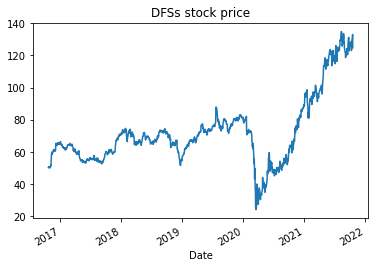

In [7]:
goodCompanies = ['DFS']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="5Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)


In [ ]:
import plotly.express as px
goodCompanies = ['Date','AMD','AIG','CMG','DXCM','LLY','TGT','ZBRA']

df = finalData[goodCompanies]

# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()
# plot interactive chart for stocks data
# plot interactive chart for stocks data
interactive_plot(df, 'Stock Prices')

In [ ]:
finalDataEnd = finalData[(finalData['Date'] >= '2020-12-29') & (finalData['Date'] <= '2021-06-10')]


In [ ]:
youtubeCompanies = ['Date','CTAS','MAR']
finalDataEnd[youtubeCompanies]

In [ ]:
finalVolume=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Close',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Volume': company})
  tmp = tsla_df[str(company)]

  finalVolume = finalVolume.append(tmp, ignore_index=True)
finalVolume = finalVolume.T # or df2.transpose()
for i in range(len(companies)):
  finalVolume = finalVolume.rename(columns={i: companies[i]})




finalVolume['Date'] = finalVolume.index
col_name="Date"
first_col = finalVolume.pop(col_name)
finalVolume.insert(0, col_name, first_col)
finalVolume.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceVolume.csv', index = False, header=True)
finalVolume